In [7]:
from jasmine import RTModelTemplateForBinaryLightCurve as rtm2l
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [8]:
rt_template = rtm2l(template_line=2,
                    path_to_template='/Users/stela/Documents/Scripts/'
                                     'RTModel_project/RTModel/RTModel/data/TemplateLibrary.txt',
                    input_peak_t1=20,
                    input_peak_t2=50,)

In [9]:
# Set outputs
rt_template

RTModelTemplateForBinaryLightCurve(template_line=2, separation_s=0.7, mass_ratio_q=0.5, impact_parameter_u0=0.15, angle_alpha=3.5, source_radius_rho=0.01, pre_calculated_peak_tp1=-0.183, pre_calculated_peak_tp2=0.016, einstein_time_tE=150.7537688442211, peak_time_t0=47.58793969849246, input_peak_t1=20, input_peak_t2=50)

In [10]:
# Calculate magnification using VBB and source trajectory using VBB
rt_template.rtmodel_magnification_using_vbb(n_points=100)
rt_template.rtmodel_source_trajectory_using_vbb()
rt_template.rtmodel_caustics_using_vbb();

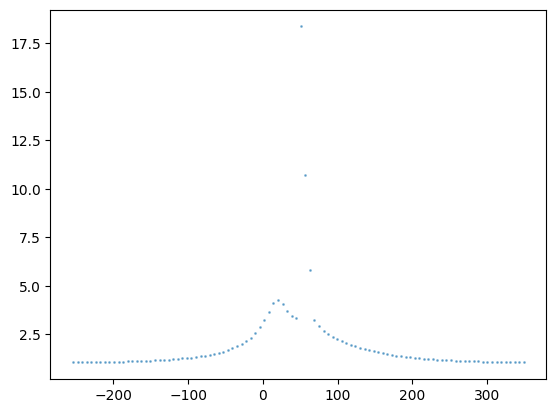

In [11]:
plt.scatter(rt_template.times, rt_template.magnification, s=1, alpha=0.5)

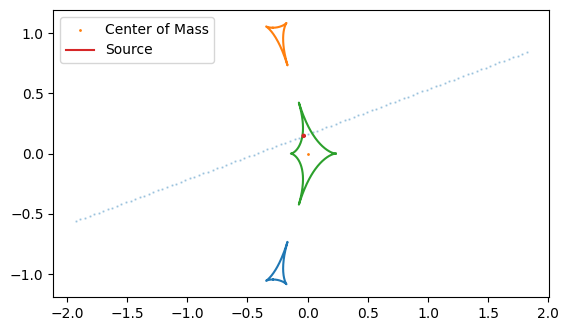

In [15]:
plt.scatter(rt_template.source_trajectory_y1, rt_template.source_trajectory_y2, s=0.5, alpha=0.3)
for cau in rt_template.caustics:
    plt.plot(cau[0],cau[1])
plt.scatter(0,0, s=1, label='Center of Mass')  
middle = int(len(rt_template.source_trajectory_y1)/2)
z = (rt_template.source_trajectory_y1[middle] + 1j*rt_template.source_trajectory_y2[middle]) + rt_template.source_radius_rho * np.exp(1j*np.linspace(0,2*np.pi,100))
plt.plot(z.real, z.imag, label='Source')
plt.gca().set_aspect('equal')
plt.legend()

In [16]:
rt_template.separation_s, rt_template.mass_ratio_q

(0.7, 0.5)

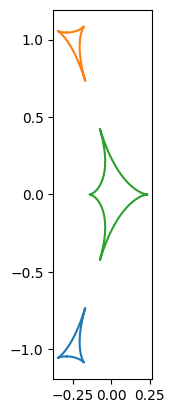

In [17]:
import VBBinaryLensing
vbb = VBBinaryLensing.VBBinaryLensing()
caustics = vbb.Caustics(0.7, 0.5)
for cau in caustics:
    plt.plot(cau[0],cau[1])
plt.gca().set_aspect('equal')